In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("C:/Users/sambu/Downloads/retirement-income-in-the-past-12-months-for-households.csv")

# Retirement Income Data Overview

This dataset can be accessed on Data.gov: [Retirement Income in the Past 12 Months for Households](https://www.data.gov/)
 and provides insights into retirement income across various neighborhoods. The data includes estimates and margin of error statistics related to retirement income for households over the past 12 months.

## Dataset Overview

The dataset contains the following columns:

- **Neighborhood**: Identifies the neighborhood for which the data is reported. This variable allows for geographical analysis and comparisons of retirement income across different areas.

- **Id**: A unique identifier for each entry in the dataset, facilitating easy reference and indexing.

- **Estimate; Total**: Represents the total number of households in the specified neighborhood over the past 12 months.

- **Margin of Error; Total**: Indicates the margin of error for the total estimate, providing insight into the reliability of the estimate.

- **Estimate; Total: - With retirement income**: This column contains the estimated number of households that receive retirement income within the specified neighborhood.

- **Margin of Error; Total: - With retirement income**: Shows the margin of error for the estimate of households with retirement income, indicating the potential variability in the data.

- **Estimate; Total: - No retirement income**: This value indicates the estimated number of households that do not receive any retirement income in the specified neighborhood.

- **Margin of Error; Total: - No retirement income**: Provides the margin of error for the estimate of households without retirement income, reflecting the uncertainty of this statistic.

## Summary
This dataset serves as a valuable resource for analyzing retirement income trends and understanding the financial well-being of households in various neighborhoods. It can support research in socioeconomic studies, policy-making related to retirement planning, and resource allocation for community services aimed at supporting retirees.

For more detailed information and to access the dataset, visit [Data.gov - Retirement Income Data](https://www.data.gov).


In [6]:
df.head()

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With retirement income,Margin of Error; Total: - With retirement income,Estimate; Total: - No retirement income,Margin of Error; Total: - No retirement income
0,Allegheny Center,1,733.0,103.000000,134.0,66.000000,599.0,105.000000
1,Allegheny West,2,150.0,46.000000,12.0,13.000000,138.0,45.000000
2,Allentown,3,1138.0,152.751432,128.0,46.540305,1010.0,146.181394
3,Arlington,4,685.0,105.366029,102.0,44.045431,583.0,101.666120
4,Arlington Heights,5,170.0,69.000000,0.0,10.000000,170.0,69.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Neighborhood                                      91 non-null     object 
 1   Id                                                91 non-null     int64  
 2   Estimate; Total:                                  91 non-null     float64
 3   Margin of Error; Total:                           91 non-null     float64
 4   Estimate; Total: - With retirement income         91 non-null     float64
 5   Margin of Error; Total: - With retirement income  91 non-null     float64
 6   Estimate; Total: - No retirement income           91 non-null     float64
 7   Margin of Error; Total: - No retirement income    91 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 5.8+ KB


In [10]:
missing_values = df.isnull().sum()
print(missing_values)

df.ffill()

Neighborhood                                        0
Id                                                  0
Estimate; Total:                                    0
Margin of Error; Total:                             0
Estimate; Total: - With retirement income           0
Margin of Error; Total: - With retirement income    0
Estimate; Total: - No retirement income             0
Margin of Error; Total: - No retirement income      0
dtype: int64


,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - With retirement income,Margin of Error; Total: - With retirement income,Estimate; Total: - No retirement income,Margin of Error; Total: - No retirement income
0,Allegheny Center,1,733.0,103.000000,134.0,66.000000,599.0,105.000000
1,Allegheny West,2,150.0,46.000000,12.0,13.000000,138.0,45.000000
2,Allentown,3,1138.0,152.751432,128.0,46.540305,1010.0,146.181394
3,Arlington,4,685.0,105.366029,102.0,44.045431,583.0,101.666120
4,Arlington Heights,5,170.0,69.000000,0.0,10.000000,170.0,69.000000
...,...,...,...,...,...,...,...,...
86,Upper Lawrenceville,87,1262.0,144.100659,149.0,70.042844,1113.0,148.748109
87,West End,88,120.0,59.000000,15.0,15.000000,105.0,58.000000
88,West Oakland,89,592.0,89.106678,40.0,24.207437,552.0,91.934759
89,Westwood,90,1514.0,118.827606,316.0,74.303432,1198.0,130.230565


In [11]:
df.columns

Index(['Neighborhood', 'Id', 'Estimate; Total:', 'Margin of Error; Total:',
       'Estimate; Total: - With retirement income',
       'Margin of Error; Total: - With retirement income',
       'Estimate; Total: - No retirement income',
       'Margin of Error; Total: - No retirement income'],
      dtype='object')

                               SARIMAX Results                                
Dep. Variable:       Estimate; Total:   No. Observations:                   72
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -617.562
Date:                Thu, 17 Oct 2024   AIC                           1241.124
Time:                        14:11:07   BIC                           1247.912
Sample:                             0   HQIC                          1243.823
                                 - 72                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0900      0.123     -0.729      0.466      -0.332       0.152
ma.L1         -1.0000      0.095    -10.563      0.000      -1.186      -0.814
sigma2      1.987e+06   4.76e-08   4.17e+13      0.0

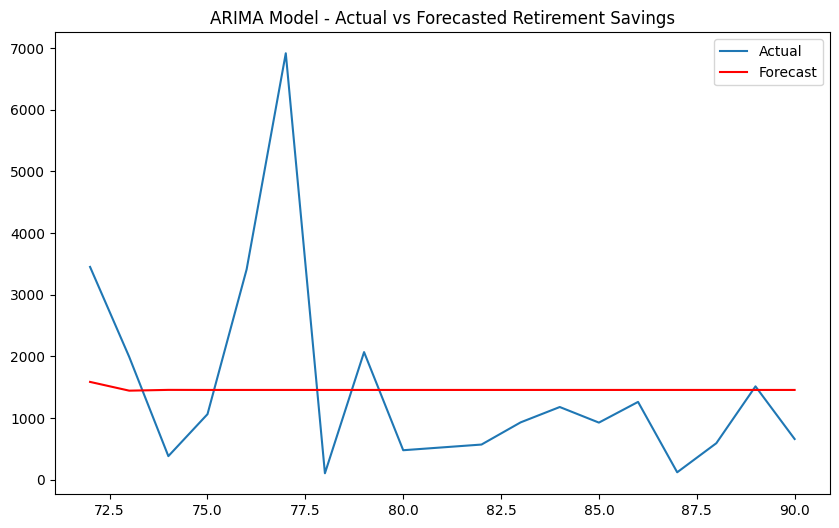

In [13]:
y = df['Estimate; Total:']

# Split the data into training and testing sets based on time
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]

# Fit ARIMA model
model = ARIMA(y_train, order=(1, 1, 1))  # Adjust p, d, q based on ACF/PACF
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make predictions on the test set
y_pred = model_fit.forecast(steps=len(y_test))

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"ARIMA Model Evaluation:\nMAE: {mae}, RMSE: {rmse}")

# Plot actual vs forecasted savings
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Forecast', color='red')
plt.title('ARIMA Model - Actual vs Forecasted Retirement Savings')
plt.legend()
plt.show()


Random Forest Model Evaluation:
MAE: 1054.38, RMSE: 1336.564943485933


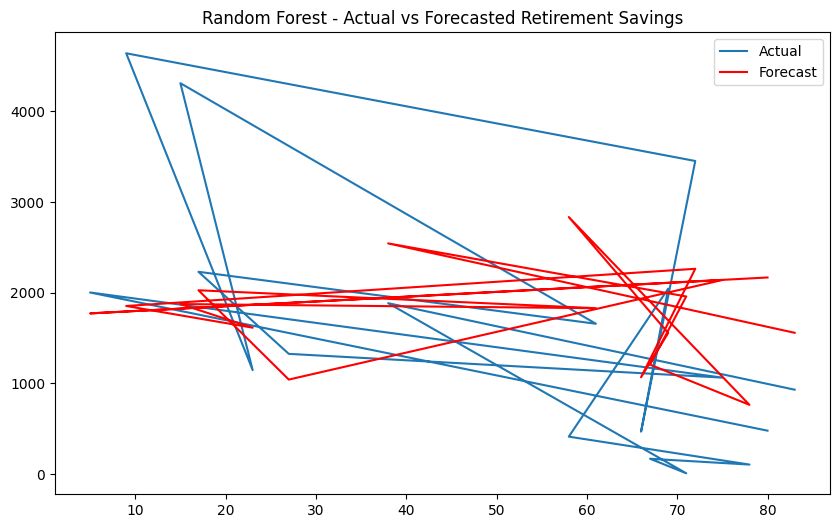

In [17]:
#lagged features for time series forecasting
df_lagged = pd.DataFrame(y)
for i in range(1, 6):  # Use 5 lag features
    df_lagged[f'lag_{i}'] = y.shift(i)

df_lagged.dropna(inplace=True)

X_lagged = df_lagged.drop('Estimate; Total:', axis=1)
y_lagged = df_lagged['Estimate; Total:']
X_train_lagged, X_test_lagged, y_train_lagged, y_test_lagged = train_test_split(X_lagged, y_lagged, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_lagged, y_train_lagged)

y_pred_rf = rf_model.predict(X_test_lagged)

# Evaluation
mae_rf = mean_absolute_error(y_test_lagged, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_lagged, y_pred_rf))

print(f"Random Forest Model Evaluation:\nMAE: {mae_rf}, RMSE: {rmse_rf}")

# Plot actual vs forecasted savings
plt.figure(figsize=(10, 6))
plt.plot(y_test_lagged.index, y_test_lagged, label='Actual')
plt.plot(y_test_lagged.index, y_pred_rf, label='Forecast', color='red')
plt.title('Random Forest - Actual vs Forecasted Retirement Savings')
plt.legend()
plt.show()

In [18]:
print("Model Performance Comparison:")
print(f"ARIMA Model: MAE = {mae}, RMSE = {rmse}")
print(f"Random Forest Model: MAE = {mae_rf}, RMSE = {rmse_rf}")

Model Performance Comparison:
ARIMA Model: MAE = 1086.4916860413348, RMSE = 1579.6303771379312
Random Forest Model: MAE = 1054.38, RMSE = 1336.564943485933


# Model Performance Comparison

### ARIMA Model:
- **Mean Absolute Error (MAE):** 1086.49
- **Root Mean Squared Error (RMSE):** 1579.63

### Random Forest Model:
- **Mean Absolute Error (MAE):** 1054.38
- **Root Mean Squared Error (RMSE):** 1336.56

## Interpretation:

- **MAE:** The Random Forest model has a lower MAE compared to the ARIMA model (1054.38 vs 1086.49). This suggests that, on average, the predictions from the Random Forest model are closer to the actual values than those from the ARIMA model.
  
- **RMSE:** The RMSE is also lower for the Random Forest model (1336.56) compared to the ARIMA model (1579.63). Since RMSE gives more weight to larger errors, this further indicates that the Random Forest model is performing better in terms of reducing large prediction errors.
